# Altair Example 7 - Bob Ross Painting Color Analysis
This notebook demonstrates methods to display multiple charts in complex ways using Altair.  The data used to create this visualization is [FiveThirtyEight]()'s data used in the article [A Statistical Analysis of the Work of Bob Ross](https://fivethirtyeight.com/features/a-statistical-analysis-of-the-work-of-bob-ross/) (Hickey, 2014).  The original dataset can be found at FiveThirtyEight's Github: [bob-ross](https://github.com/fivethirtyeight/data/tree/master/bob-ross).  Images of the painting and their color analysis from each show can be found in jwilber's Github: [Bob_Ross_Paintings](https://github.com/jwilber/Bob_Ross_Paintings).

In [1]:
import pandas as pd
import altair as alt
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# The code in this cell was written and provided by the instruction team of 
# University of Michigan - School of Information - SIADS-622 - Information Visualization II
# Taught by Professor Eytan Adar (2021)

# the paints Bob used
rosspaints = ['alizarin crimson','bright red','burnt umber','cadmium yellow','dark sienna', 
              'indian yellow','indian red','liquid black','liquid clear','black gesso',
              'midnight black','phthalo blue','phthalo green','prussian blue','sap green',
              'titanium white','van dyke brown','yellow ochre']

# hex values for the paints above
rosspainthex = ['#94261f','#c06341','#614f4b','#f8ed57','#5c2f08','#e6ba25','#cd5c5c',
                '#000000','#ffffff','#000000','#36373c','#2a64ad','#215c2c','#325fa3',
                '#364e00','#f9f7eb','#2d1a0c','#b28426']

# boolean features about what an image includes
imgfeatures = ['Apple frame', 'Aurora borealis', 'Barn', 'Beach', 'Boat', 
               'Bridge', 'Building', 'Bushes', 'Cabin', 'Cactus', 
               'Circle frame', 'Cirrus clouds', 'Cliff', 'Clouds', 
               'Coniferous tree', 'Cumulis clouds', 'Decidious tree', 
               'Diane andre', 'Dock', 'Double oval frame', 'Farm', 
               'Fence', 'Fire', 'Florida frame', 'Flowers', 'Fog', 
               'Framed', 'Grass', 'Guest', 'Half circle frame', 
               'Half oval frame', 'Hills', 'Lake', 'Lakes', 'Lighthouse', 
               'Mill', 'Moon', 'At least one mountain', 'At least two mountains', 
               'Nighttime', 'Ocean', 'Oval frame', 'Palm trees', 'Path', 
               'Person', 'Portrait', 'Rectangle 3d frame', 'Rectangular frame', 
               'River or stream', 'Rocks', 'Seashell frame', 'Snow', 
               'Snow-covered mountain', 'Split frame', 'Steve ross', 
               'Man-made structure', 'Sun', 'Tomb frame', 'At least one tree', 
               'At least two trees', 'Triple frame', 'Waterfall', 'Waves', 
               'Windmill', 'Window frame', 'Winter setting', 'Wood framed']

# load the data frame
bobross = pd.read_csv("assets/bobross.csv")

# enable correct rendering (unnecessary in later versions of Altair)
alt.renderers.enable('default')

# uses intermediate json files to speed things up
alt.data_transformers.enable('json')

def build_condprob_df(keys):
    cond_list = []
    for y in bobross.year.unique():
        for k1 in keys:
            for k2 in keys:
                if k1==k2:
                    cond_list.append({'key1': k1, 'key2': k2, 'year':y, 'prob':1})  # make it that little bit faster
                else:
                    cond_list.append({'key1': k1, 'key2': k2, 'year':y, 'prob':condprobability(bobross, k1, k2, y)})
    return pd.DataFrame(cond_list)

# Enable FiveThirtyEight theme
alt.themes.enable('fivethirtyeight')

ThemeRegistry.enable('fivethirtyeight')

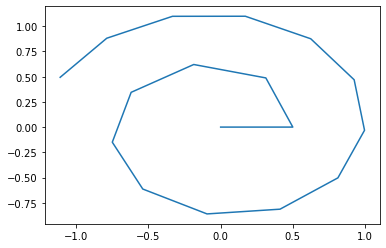

In [3]:
# The following spiral_points() function is credited to the stackoverflow user liborm
# Source: https://stackoverflow.com/a/27528612/8174844
def spiral_points(arc=1, separation=1):
    """generate points on an Archimedes' spiral
    with `arc` giving the length of arc between two points
    and `separation` giving the distance between consecutive 
    turnings
    - approximate arc length with circle arc at given distance
    - use a spiral equation r = b * phi
    """
    def p2c(r, phi):
        """polar to cartesian
        """
        return (r * math.cos(phi), r * math.sin(phi))

    # yield a point at origin
    yield (0, 0)
    yield (0, 0) # Custom: Added this to have two points in center (fixes custom positioning)

    # initialize the next point in the required distance
    r = arc
    b = separation / (2 * math.pi)
    # find the first phi to satisfy distance of `arc` to the second point
    phi = float(r) / b
    while True:
        yield p2c(r, phi)
        # advance the variables
        # calculate phi that will give desired arc length at current radius
        # (approximating with circle)
        phi += float(arc) / r
        r = b * phi
        
s = spiral_points(separation=0.5, arc=0.5)
x,y = zip(*[next(s) for _ in range(len(rosspaints))])

# Display spiral plot example - This is how the swatches will be placed
plt.plot(x,y)
plt.show()

In [4]:
# This is code written by Nicholas Miller

def colorSmallMultiples(season):
    
    # return an Altair chart
    # season is the integer representing the season of the show are interested in. Limit your images
    # to that season in the small multiples display.
    
    # YOUR CODE HERE
    num_per_row = 4
    sdf = bobross[bobross.season == season].reset_index(drop=True)
    rows = []
    
    # Original image source: https://www.walmart.com
    pal_df = pd.DataFrame({'x':[0], 'y':[0], 'url':'https://raw.githubusercontent.com/cassova/Altair-Examples---Data-Visualizations/fd1a60603c5fbb6ca9665c568a1ad6f3236ec7c0/asset/palette.png'})
    
    for row_num in range(math.ceil(len(sdf)/num_per_row)):
        row = []
        for i in range(num_per_row):
            p = i+(row_num*num_per_row)
            if p >= len(sdf):
                break
            df = pd.DataFrame(sdf[rosspaints].iloc[p]).sort_values(p).reset_index()
            df.columns = ['color_name','value']
            df['x'] = x # spiral x/y from spiral_points() call above
            df['y'] = y

            palette = alt.Chart(pal_df).mark_image(
                width=200,
                height=200/1.27
            ).encode(
                x=alt.X(
                    'x',
                    title=None,
                    axis=alt.Axis(
                        title='',
                        values=[0],
                        labels=False,
                    )
                ),
                y=alt.Y(
                    'y',
                    title=None,
                    axis=alt.Axis(
                        title='',
                        values=[0],
                        labels=False,
                    )
                ),
                url='url'
            )
                
            colors = alt.Chart(df).mark_circle(
                stroke='black',
                strokeWidth=1,
            ).encode(
                x=alt.X(
                    'x',
                    axis=alt.Axis(title='',labels=False, grid=False, ticks=False, domain=False),
                ),
                y=alt.Y(
                    'y',
                    axis=alt.Axis(title='',labels=False, grid=False, ticks=False, domain=False),
                ),
                color=alt.Color(
                    'color_name',
                    legend=None,
                    scale=alt.Scale(
                        domain=rosspaints,
                        range=rosspainthex,
                    ),
                ),
                size=alt.Size(
                    'value',
                    legend=None
                ),
            ).properties(
                width=120,
                height=90,
                title={"text": sdf.iloc[p]['TITLE'].title(),
                       "fontSize":12,
                       "anchor":"middle",
                       "offset":0
                      }
            )
            row.append(palette + colors)
        rows.append(alt.hconcat(*row))

    return alt.vconcat(*rows, spacing=20).configure_view(
        strokeOpacity=0
    ).properties(
        title={"text": "Bob Ross Paintings by Color",
               "subtitle": [f"The paintings and their colors from season {season}."],
               "fontSize":24,
               "subtitleFontSize":16,
               "anchor":"start",
               "offset":15
              }
    )

In [5]:
# run this to test your code for season 1
colorSmallMultiples(1)

alt.VConcatChart(...)

![example7_1](images/example7_1.png)

In [6]:
# run this to test your code for season 2
colorSmallMultiples(2)

alt.VConcatChart(...)

![example7_2](images/example7_2.png)